## Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Importing the datasets

In [2]:
# Importing the train dataset
train_data = pd.read_csv("Dataset/Train.csv")
train_data.shape

(1284, 19)

In [3]:
# Importing the test dataset
test_data = pd.read_csv("Dataset/Test.csv")
test_data.shape

(964, 18)

## Inspecting the data

In [4]:
train_data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [5]:
train_data.dtypes

id_code                         object
current_date                    object
current_time                    object
source_name                     object
destination_name                object
train_name                      object
target                          object
country_code_source             object
longitude_source               float64
latitude_source                float64
mean_halt_times_source         float64
country_code_destination        object
longitude_destination          float64
latitude_destination           float64
mean_halt_times_destination    float64
current_year                     int64
current_week                     int64
current_day                     object
is_weekend                        bool
dtype: object

In [6]:
test_data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,mckbezdplrukagl,2016-10-06,01:05:38 AM,station$143,station$142,SZAYASZ,whber,4.243393,50.866728,39.121387,whber,4.273543,50.868337,39.121387,2016,40,Thursday,False
1,agxwrnbmzbyxsjg,2016-10-06,01:05:56 AM,station$133,station$147,ICXYXY,whber,4.326220,50.880833,95.676301,whber,4.356801,50.845658,634.164740,2016,40,Thursday,False
2,iqjojyewdyfshtj,2016-10-06,06:11:54 AM,station$632,station$544,ICWAT,whber,3.264549,50.824506,153.115607,whber,3.710675,51.035896,309.014451,2016,40,Thursday,False
3,hssqexnzirioaag,2016-10-06,07:00:00 AM,station$296,station$281,ICWYR,whber,5.599695,50.613152,87.130058,whber,5.566695,50.624550,269.124277,2016,40,Thursday,False
4,lublknpfraiznhr,2016-10-06,07:00:09 AM,station$281,station$266,ICWYR,whber,5.566695,50.624550,269.124277,whber,4.715866,50.882280,351.916185,2016,40,Thursday,False


In [7]:
my_submission = pd.DataFrame({'id_code': test_data['id_code']})
my_submission.head()

,id_code
0,mckbezdplrukagl
1,agxwrnbmzbyxsjg
2,iqjojyewdyfshtj
3,hssqexnzirioaag
4,lublknpfraiznhr


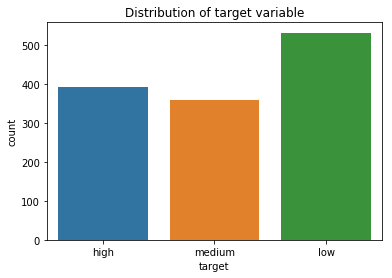

In [8]:
plt.title('Distribution of target variable')
sns.countplot(train_data['target'])
plt.show()

In [9]:
# Studying the target variable
train_data['target'].value_counts()

low       532
high      392
medium    360
Name: target, dtype: int64

In [10]:
train_data.isna().sum()

id_code                         0
current_date                    0
current_time                    0
source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
dtype: int64

In [11]:
test_data.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [12]:
train_data.nunique()

id_code                        1284
current_date                     61
current_time                   1262
source_name                     188
destination_name                218
train_name                      560
target                            3
country_code_source               4
longitude_source                187
latitude_source                 187
mean_halt_times_source          154
country_code_destination          5
longitude_destination           216
latitude_destination            213
mean_halt_times_destination     171
current_year                      1
current_week                     11
current_day                       7
is_weekend                        2
dtype: int64

In [13]:
test_data.nunique()

id_code                        964
current_date                    24
current_time                   953
source_name                    170
destination_name               168
train_name                     504
country_code_source              3
longitude_source               170
latitude_source                170
mean_halt_times_source         144
country_code_destination         4
longitude_destination          168
latitude_destination           168
mean_halt_times_destination    149
current_year                     1
current_week                     4
current_day                      7
is_weekend                       2
dtype: int64

## Data Preprocessing

In [14]:
# Dropping columns which will be of no use for our model
col_list = ['id_code']

In [15]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [16]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [17]:
date_list = ['current_date', 'current_time']
conv_date(date_list)

In [18]:
train_data.dtypes

current_date                   datetime64[ns]
current_time                   datetime64[ns]
source_name                            object
destination_name                       object
train_name                             object
target                                 object
country_code_source                    object
longitude_source                      float64
latitude_source                       float64
mean_halt_times_source                float64
country_code_destination               object
longitude_destination                 float64
latitude_destination                  float64
mean_halt_times_destination           float64
current_year                            int64
current_week                            int64
current_day                            object
is_weekend                               bool
dtype: object

In [19]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)
def get_hour(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.hour)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.hour)

In [20]:
get_year('current_year', 'current_date')
get_month('current_month', 'current_date')
get_hour('current_hour', 'current_time')

In [21]:
col_list = ['current_date', 'current_time']

In [22]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [23]:
train_data.head()

,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,current_month,current_hour
0,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,20
1,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,20
2,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,20
3,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,20
4,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,7,20


In [24]:
train_data.isna().sum()

source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
current_month                   0
current_hour                    0
dtype: int64

In [25]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [26]:
imp_none_list = ['country_code_source', 'country_code_destination']
impute_none(imp_none_list)

In [27]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [28]:
imp_mean_list = ['longitude_source', 'latitude_source', 'longitude_destination', 'latitude_destination', 
                 'mean_halt_times_destination']
round_mean(imp_mean_list)

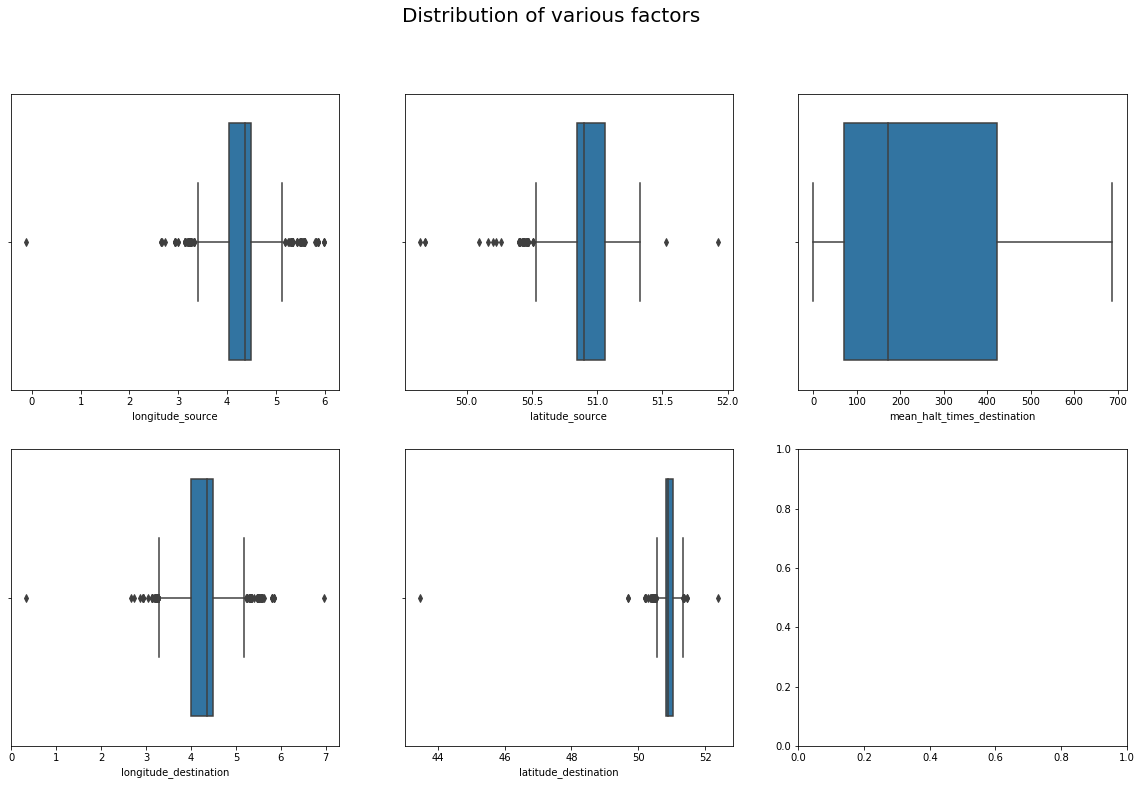

In [29]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(2,3, figsize=(20,12))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.boxplot(train_data['longitude_source'], ax = ax[0,0]) 
sns.boxplot(train_data['longitude_destination'], ax = ax[1,0]) 
sns.boxplot(train_data['latitude_source'], ax = ax[0,1])  
sns.boxplot(train_data['latitude_destination'], ax = ax[1,1])
sns.boxplot(train_data['mean_halt_times_destination'], ax = ax[0,2])
plt.show()

F:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


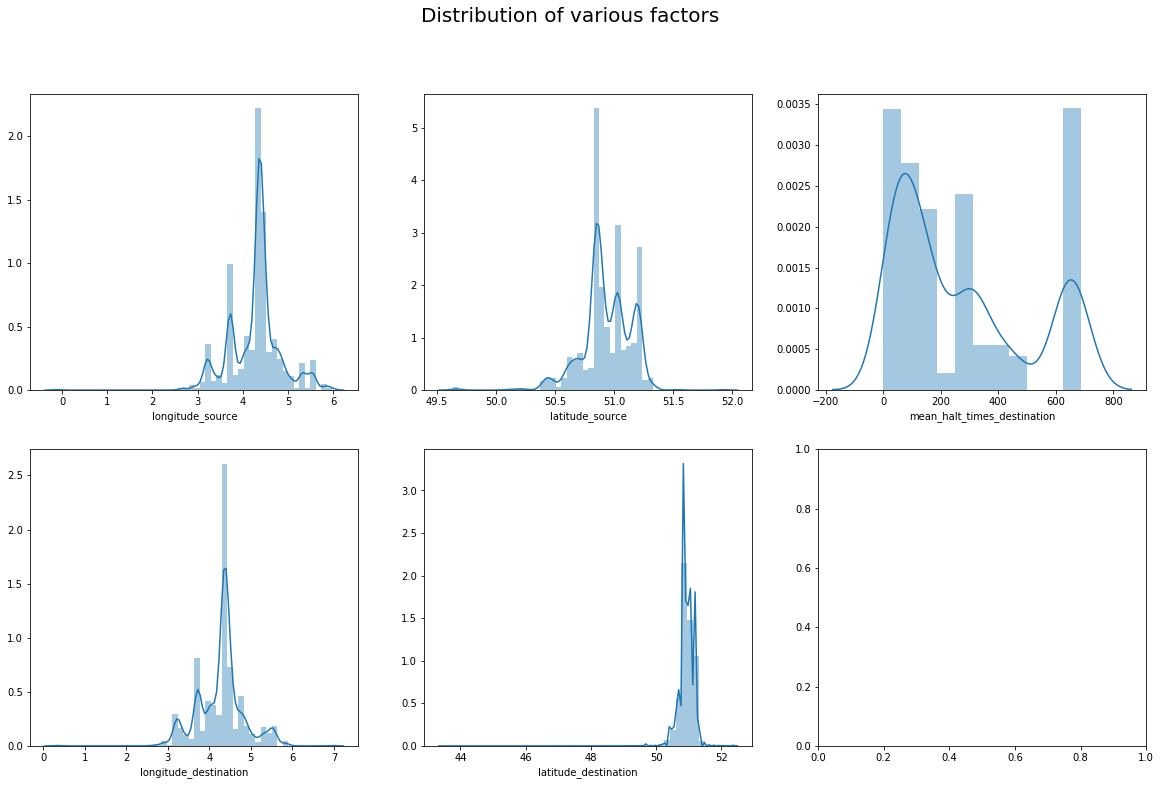

In [30]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(2,3, figsize=(20,12))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(train_data['longitude_source'], ax = ax[0,0]) 
sns.distplot(train_data['longitude_destination'], ax = ax[1,0]) 
sns.distplot(train_data['latitude_source'], ax = ax[0,1])  
sns.distplot(train_data['latitude_destination'], ax = ax[1,1])  
sns.distplot(train_data['mean_halt_times_destination'], ax = ax[0,2])
plt.show()

In [31]:
train_data.head()

,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,current_month,current_hour
0,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,2016,30,Wednesday,False,7,20
1,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,2016,30,Wednesday,False,7,20
2,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,2016,30,Wednesday,False,7,20
3,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,2016,30,Wednesday,False,7,20
4,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,2016,30,Wednesday,False,7,20
